In [2]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# load model

In [5]:
model_dir ='/SSD/DATA/ModelTrainByImages/R2_1//models/B5R2b5_5FP_1FC_fold1_2.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [6]:
# validation
import pandas as pd
base_dir  = '/SSD/DATA/Images/Image1/'
dataframe = pd.read_csv( '/home/USAI002/codes/USAI/Validationdf_fold1.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/USAI002/codes/USAI/Traindf_fold1.csv')
base_dir0 = '/SSD/DATA/Images/Image1/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [7]:
import pandas as pd
df0 = pd.read_csv (r'/home/USAI002/codes/USAI/Testdf_USAI001path.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(1312, 31)
(1312, 31)
Normal:  (857, 31)
Abnormal:  (455, 31)


,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,...,filename,category,Prob,Predict_AN,Predict_15AB,FP_category,FP_Prob,FP_ProbAll,Predict_5FP,PathG
0,0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,AB01 P1 C040.JPG,Normal,0.958334,Incorrect,Incorrect,FP-B,0.475344,"[0.22316645916382064, 0.47534361094783256, 0.1...",Incorrect,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...
1,1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,AB01 P2 C040.JPG,AB01,0.999923,Correct,Correct,FP-B,0.421248,"[0.37420833333333337, 0.42124777662277657, 0.1...",Incorrect,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...
2,2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,AB01 P4-1 C040.JPG,AB02,0.932391,Correct,Incorrect,FP-B,0.539706,"[0.26481242746053524, 0.5397056655678111, 0.16...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...
3,3,3,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,...,AB01 P5-1 C040.JPG,AB01,0.758282,Correct,Correct,FP-C,0.369984,"[0.23283089826839828, 0.36367942889185334, 0.3...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...
4,4,4,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,AB01 P3-1 C040.JPG,AB02,0.995624,Correct,Incorrect,FP-B,0.470639,"[0.3576083715596331, 0.47063899180584956, 0.14...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...


In [8]:
# dataframe.info()

In [9]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'PathG',
        y_col = 'Views',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1312 validated image filenames belonging to 5 classes.
{0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}


# Prediction

In [11]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['PathG'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['category_5FPNet'] = pred_list
dataframe['Prob_5FPNet'] = prob_list

In [20]:
dataframe.head(5)

,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,...,Predict_AN,Predict_15AB,FP_category,FP_Prob,FP_ProbAll,Predict_5FP,PathG,category_5FPNet,Prob_5FPNet,Predict_5FPNet
0,0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,Incorrect,Incorrect,FP-B,0.475344,"[0.22316645916382064, 0.47534361094783256, 0.1...",Incorrect,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...,FP-A,0.999998,Correct
1,1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,Correct,Correct,FP-B,0.421248,"[0.37420833333333337, 0.42124777662277657, 0.1...",Incorrect,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...,FP-A,1.000000,Correct
2,2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,Correct,Incorrect,FP-B,0.539706,"[0.26481242746053524, 0.5397056655678111, 0.16...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...,FP-B,1.000000,Correct
3,3,3,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,...,Correct,Correct,FP-C,0.369984,"[0.23283089826839828, 0.36367942889185334, 0.3...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...,FP-C,1.000000,Correct
4,4,4,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,Correct,Incorrect,FP-B,0.470639,"[0.3576083715596331, 0.47063899180584956, 0.14...",Correct,/SSD/DATA/USAI/ABnormal01/1 ABNORMAL/cropped/A...,FP-B,0.988930,Correct


In [19]:
# cat = dataframe['category_5FPNet'].array
# act= dataframe['Views'].array
# aa = []
# for i in range(len(dataframe)):
#     if cat[i] == act[i]:
#         a = 'Correct'
#     else:
#         a = 'Incorrect'
#     aa.append(a)
# dataframe['Predict_5FPNet'] = aa

In [21]:
# os.chdir( '/home/USAI002/codes/USAI/')
# dataframe.to_csv('Testdf_res.csv')

# Visualization

In [13]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category_5FPNet'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Views'])
print('Actual : ',len(classe))
print(classe)

Predicted :  5
{'FP-C', 'FP-B', 'FP-E', 'FP-A', 'FP-D'}
Actual :  5
{'FP-C', 'FP-B', 'FP-E', 'FP-A', 'FP-D'}


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Views'].array
pred = data_train['category_5FPNet'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.91158536585365%
              precision    recall  f1-score   support

        FP-A       0.95      0.88      0.91       271
        FP-B       0.91      0.95      0.93       401
        FP-C       0.97      0.92      0.94       374
        FP-D       0.86      0.97      0.91       196
        FP-E       0.97      0.96      0.96        70

    accuracy                           0.93      1312
   macro avg       0.93      0.93      0.93      1312
weighted avg       0.93      0.93      0.93      1312



### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

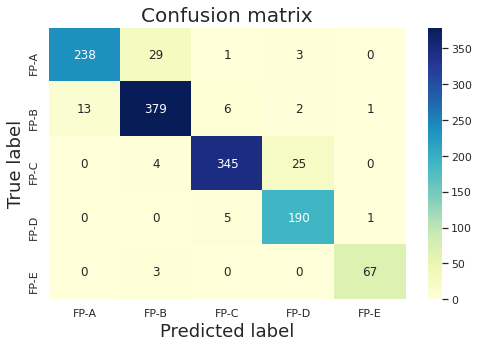

In [17]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)